In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# Função para converter valores 'k' em milhares
def convert_to_numeric(value):
  if isinstance(value, str) and 'k' in value:
    return float(value.replace('k', '')) * 1000
  elif isinstance(value, str) and 'm' in value:
    return float(value.replace('m', '')) * 1000000
  elif isinstance(value, str) and 'b' in value:
    return float(value.replace('b', '')) * 1000000000
  try:
    return float(value)
  except (TypeError, ValueError):
    return value

In [111]:
# Função para converter strings de porcentagem em valores numéricos
def convert_percentage_to_numeric(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except (TypeError, ValueError):
        return value

In [112]:
# Carregar o dataset
df = pd.read_csv('top_insta_influencers_data.csv')

In [113]:
# Aplicar a função para converter valores 'k' em milhares
columns_to_convert = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']
for column in columns_to_convert:
    if column in df.columns:
        df[column] = df[column].apply(convert_to_numeric)
    else:
        print(f"Coluna {column} não encontrada no DataFrame.")

In [114]:
# Aplicar a função para converter strings de porcentagem em valores numéricos
percentage_columns = ['60_day_eng_rate']  # Adicione aqui todas as colunas que contêm valores percentuais
for column in percentage_columns:
    if column in df.columns:
        df[column] = df[column].apply(convert_percentage_to_numeric)
    else:
        print(f"Coluna {column} não encontrada no DataFrame.")

In [115]:
# Preencher valores NaN na coluna "60_day_eng_rate" com 0
df['60_day_eng_rate'].fillna(0, inplace=True)

<ipython-input-115-07e1e695fe05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['60_day_eng_rate'].fillna(0, inplace=True)


In [116]:
# Excluir a coluna "country" para evitar valores de texto no modelo
df = df.drop(columns=['country'])

In [117]:
print("Dados depois do tratamento de NaN:")
print(df.isna().sum())

Dados depois do tratamento de NaN:
rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
dtype: int64


In [118]:
print("Dados depois da conversão:")
print(df[columns_to_convert].head())

Dados depois da conversão:
    posts    followers  avg_likes  new_post_avg_like   total_likes
0  3300.0  475800000.0  8700000.0          6500000.0  2.900000e+10
1  6900.0  366200000.0  8300000.0          5900000.0  5.740000e+10
2   890.0  357300000.0  6800000.0          4400000.0  6.000000e+09
3  1800.0  342700000.0  6200000.0          3300000.0  1.150000e+10
4  6800.0  334100000.0  1900000.0           665300.0  1.250000e+10


In [119]:
# Definir as features (X) e o alvo (y)
X = df.drop(['60_day_eng_rate', 'channel_info'], axis=1)  # Removemos as colunas não numéricas e a variável alvo
y = df['60_day_eng_rate']

In [120]:
# Verificar se X contém apenas colunas numéricas
print("Tipos de dados em X:")
print(X.dtypes)

Tipos de dados em X:
rank                   int64
influence_score        int64
posts                float64
followers            float64
avg_likes            float64
new_post_avg_like    float64
total_likes          float64
dtype: object


In [121]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Criar o modelo de regressão linear
model = LinearRegression()

In [124]:
# Aplicar a validação cruzada
cv_scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')

In [125]:
# Calcular o MSE e R² médios
cv_mse_mean = -cv_scores_mse.mean()
cv_r2_mean = cv_scores_r2.mean()

In [126]:
# Treinar o modelo nos dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [127]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [128]:
# Calcular o MSE e R² nos dados de teste
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

In [129]:
print("Mean Squared Error no conjunto de teste:", test_mse)
print("R^2 Score no conjunto de teste:", test_r2)
print("Mean Squared Error médio da validação cruzada:", cv_mse_mean)
print("R^2 Score médio da validação cruzada:", cv_r2_mean)

Mean Squared Error no conjunto de teste: 4.403333197374501e-05
R^2 Score no conjunto de teste: 0.9304843508353042
Mean Squared Error médio da validação cruzada: 0.00015406426273048494
R^2 Score médio da validação cruzada: 0.5863220441877339


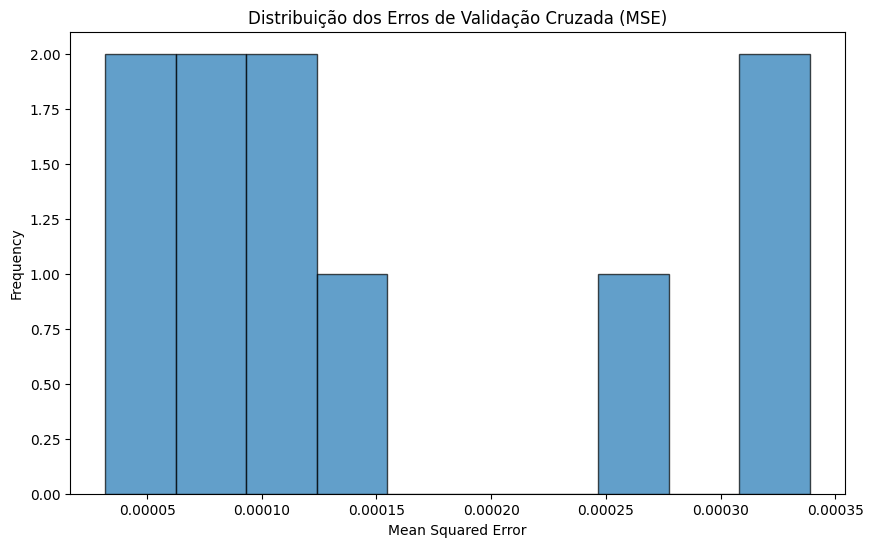

In [130]:
# Exibir a distribuição dos erros da validação cruzada
plt.figure(figsize=(10, 6))
plt.hist(-cv_scores_mse, bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribuição dos Erros de Validação Cruzada (MSE)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.show()